In [18]:
import os 
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import sim functions
from neurodsp.sim.combined import sim_combined, sim_peak_oscillation
from neurodsp.sim.aperiodic import sim_powerlaw
from neurodsp.utils import set_random_seed

# Import function to compute power spectra
from neurodsp.spectral import compute_spectrum

# Import utilities for plotting data
from neurodsp.utils import create_times
from neurodsp.plts.spectral import plot_power_spectra
from neurodsp.plts.time_series import plot_time_series

In [19]:
# Set some general settings, to be used across all simulations
num_signals = 10000
fs = 2000 #sampling 주파수
n_seconds = 2 #simulation 지속시간
times = create_times(n_seconds, fs) #시간 백터

# Define the components of the combined signal to simulate
n_neurons_range = (800, 1200)  # range for number of neurons
firing_rate_range = (2, 4)     # range for firing rate
t_ker_range = (0.8, 1.2)       # range for t_ker
tau_r_range = (0.001, 0.003)   # range for tau_r
tau_d_range = (0.015, 0.025)   # range for tau_d
freq_range = (15, 25)          # range for oscillation frequency
amplitude_range = (10,20)   # range for amplitude_range

# Sample values from the specified ranges
n_neurons = np.random.randint(n_neurons_range[0], n_neurons_range[1] + 1)
firing_rate = np.random.uniform(firing_rate_range[0], firing_rate_range[1])
t_ker = np.random.uniform(t_ker_range[0], t_ker_range[1])
tau_r = np.random.uniform(tau_r_range[0], tau_r_range[1])
tau_d = np.random.uniform(tau_d_range[0], tau_d_range[1])
freq = np.random.uniform(freq_range[0], freq_range[1])

# 초기 (0, 4000) 크기의 빈 numpy 배열 생성
set_shape_2d = np.zeros((0, len(times)))
# 초기 (4000, ) 크기의 빈 numpy 배열 생성
set_shape_1d = np.zeros(len(times))

# -------- < original signal data > ------------------------------------------------

data_signal = set_shape_2d.copy()

In [20]:
# ---------------------- << 생성 - data_signal >> ----------------------------------------------------------------------------------------------------------
for idx in range(num_signals):
   components = {
      'sim_synaptic_current': {
      'n_neurons': n_neurons,
      'firing_rate': firing_rate,
      't_ker': t_ker,
      'tau_r': tau_r,
      'tau_d': tau_d
      },
      'sim_oscillation': {
      'freq': freq
      }
   }
   # Simulate an oscillation over an aperiodic component
   signal = sim_combined(n_seconds, fs, components)
   
   data_signal = np.vstack((data_signal, signal)) # (10000, 4000)

KeyboardInterrupt: 

(10000, 4000)


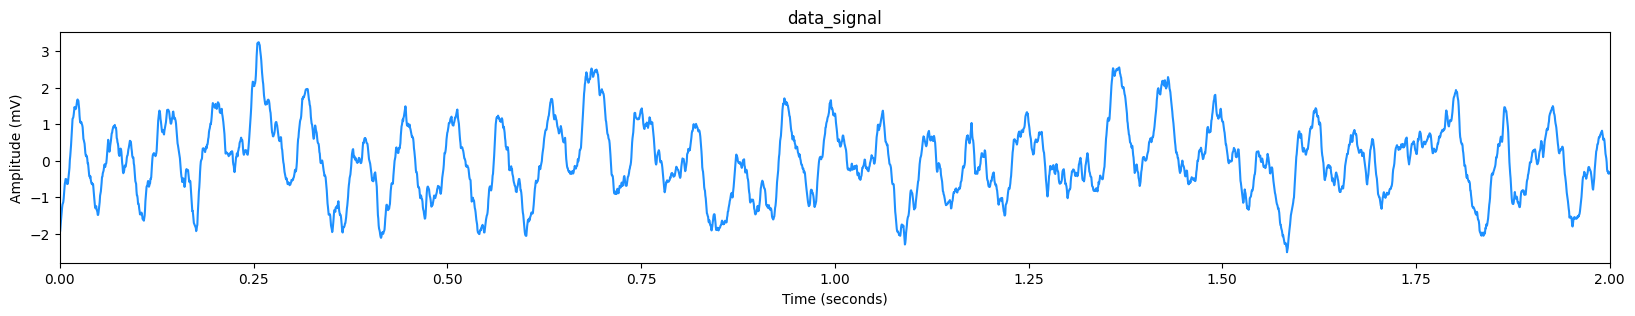

In [ ]:
# 확대할 구간 설정
plt.figure(figsize=(20, 3))

plt.plot(times, data_signal[0, :], label = 'data signal', c='dodgerblue')
plt.xlim([0, 2])
plt.ylabel("Amplitude (mV)")
plt.xlabel("Time (seconds)")
plt.title('data_signal')

print(data_signal.shape)

In [ ]:
# -------- < 저장 > ------------------------------------------------

fpath = "C:/Users/stell/UGRP_Github_desktop/UGRP/data/synthetic_data/"
    
# -------- < original signal data > ------------------------------------------------

# np.save(fpath + "clean_data_paper" + ".npy", data_signal)